<a href="https://colab.research.google.com/github/spegas/Dacon/blob/main/Get_Price_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install finance-datareader

In [2]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=0aac2173c28b79e092605c1f3de19f892fa6b78d1fd1a7c2d53fbe7a04fe7ab3
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [69]:
import pandas as pd
import numpy as np
import os
import FinanceDataReader as fdr
import wget

from zipfile import ZipFile
from os.path import basename

In [7]:
if not os.path.isdir("base"):
  print("base 디렉토리 생성")
  os.makedirs("base")

if not os.path.isdir("price"):
  print("price 디렉토리 생성")
  os.makedirs("price")

In [10]:
stock_list_file_url = "https://raw.githubusercontent.com/spegas/Dacon/main/stock_list.csv"
if os.path.exists('base/stock_list.csv'):
  os.remove('base/stock_list.csv')
  print('이전에 저장된 주식 종목 리스트 파일을 삭제 합니다.')
wget.download(stock_list_file_url, 'base/stock_list.csv')
print('주식 종목 리스트 파일 다운로드 완료')

주식 종목 리스트 파일 다운로드 완료


In [ ]:
stock_list_name = 'base/stock_list.csv'
pd_stock_list = pd.read_csv(stock_list_name)
pd_stock_list['종목코드'] = pd_stock_list['종목코드'].apply(lambda x : str(x).zfill(6))
pd_stock_list.head(10)

In [14]:
start_date = '20200101'
end_date = '20211031'

In [ ]:
for f_index in range(0, pd_stock_list.shape[0]):
  f_code = pd_stock_list.iloc[f_index]['종목코드']
  f_name = pd_stock_list.iloc[f_index]['종목명']
  price_filename = str('price/') + str(f_code) + str('_price.csv')
  if not os.path.exists(price_filename):
    f_price = fdr.DataReader(f_code, start = start_date, end = end_date)
    f_price.to_csv(price_filename)
    print('[종목코드 : %s, 종목명 : %s] 가격 정보 저장 완료' % (str(f_code), str(f_name)))
  else:
    print('[종목코드 : %s, 종목명 : %s] 가격 정보 파일 존재' % (str(f_code), str(f_name)))

In [25]:
# Zip the files from given directory that matches the filter
def zipFilesInDir(dirName, zipFileName, filter):
   # create a ZipFile object
   with ZipFile(zipFileName, 'w') as zipObj:
       # Iterate over all the files in directory
       for folderName, subfolders, filenames in os.walk(dirName):
           for filename in filenames:
               if filter(filename):
                   # create complete filepath of file in directory
                   filePath = os.path.join(folderName, filename)
                   # Add file to zip
                   zipObj.write(filePath, basename(filePath))

In [29]:
zipFilesInDir('price', 'price.zip', lambda name : 'csv' in name)

In [143]:
pd_price = pd.read_csv('price/005830_price.csv')

In [144]:
pd_price

,Date,Open,High,Low,Close,Volume,Change
0,2020-01-02,52400,52600,50000,50100,194505,-0.042065
1,2020-01-03,50500,51300,50100,50800,246721,0.013972
2,2020-01-06,50800,50800,49900,50200,142825,-0.011811
3,2020-01-07,50500,50500,49450,49750,192139,-0.008964
4,2020-01-08,49250,49300,47950,48550,211203,-0.024121
...,...,...,...,...,...,...,...
447,2021-10-25,66000,66900,65600,66400,75686,0.004539
448,2021-10-26,67100,67100,65400,66000,82375,-0.006024
449,2021-10-27,65700,65900,64400,65300,116769,-0.010606
450,2021-10-28,64900,65000,60600,60800,282584,-0.068913


In [145]:
# create 20 days simple moving average column
pd_price['20_SMA'] = pd_price['Close'].rolling(window = 20, min_periods = 1).mean()
pd_price['50_SMA'] = pd_price['Close'].rolling(window = 50, min_periods = 1).mean()

In [146]:
pd_price['20_EMA'] = round(pd_price['Close'].ewm(span = 20, adjust = False).mean(), 2)
pd_price['50_EMA'] = round(pd_price['Close'].ewm(span = 50, adjust = False).mean(), 2)

In [147]:
pd_price

,Date,Open,High,Low,Close,Volume,Change,20_SMA,50_SMA,20_EMA,50_EMA
0,2020-01-02,52400,52600,50000,50100,194505,-0.042065,50100.000000,50100.000000,50100.00,50100.00
1,2020-01-03,50500,51300,50100,50800,246721,0.013972,50450.000000,50450.000000,50166.67,50127.45
2,2020-01-06,50800,50800,49900,50200,142825,-0.011811,50366.666667,50366.666667,50169.84,50130.30
3,2020-01-07,50500,50500,49450,49750,192139,-0.008964,50212.500000,50212.500000,50129.86,50115.38
4,2020-01-08,49250,49300,47950,48550,211203,-0.024121,49880.000000,49880.000000,49979.39,50053.99
...,...,...,...,...,...,...,...,...,...,...,...
447,2021-10-25,66000,66900,65600,66400,75686,0.004539,65025.000000,61806.000000,64848.80,62111.20
448,2021-10-26,67100,67100,65400,66000,82375,-0.006024,65190.000000,61970.000000,64958.43,62263.70
449,2021-10-27,65700,65900,64400,65300,116769,-0.010606,65325.000000,62134.000000,64990.96,62382.78
450,2021-10-28,64900,65000,60600,60800,282584,-0.068913,65120.000000,62184.000000,64591.82,62320.71


In [148]:
pd_price.corr()

,Open,High,Low,Close,Volume,Change,20_SMA,50_SMA,20_EMA,50_EMA
Open,1.000000,0.994792,0.995971,0.990030,-0.487829,-0.046606,0.941300,0.842325,0.960179,0.897233
High,0.994792,1.000000,0.994160,0.995576,-0.458572,0.020093,0.938323,0.842136,0.957781,0.896339
Low,0.995971,0.994160,1.000000,0.995834,-0.511856,0.007130,0.939727,0.840776,0.959067,0.894939
Close,0.990030,0.995576,0.995834,1.000000,-0.485917,0.073626,0.934374,0.836900,0.954169,0.890590
Volume,-0.487829,-0.458572,-0.511856,-0.485917,1.000000,0.050780,-0.454384,-0.405544,-0.466941,-0.416713
Change,-0.046606,0.020093,0.007130,0.073626,0.050780,1.000000,-0.071877,-0.069756,-0.063835,-0.074470
20_SMA,0.941300,0.938323,0.939727,0.934374,-0.454384,-0.071877,1.000000,0.932991,0.996159,0.972104
50_SMA,0.842325,0.842136,0.840776,0.836900,-0.405544,-0.069756,0.932991,1.000000,0.935392,0.984858
20_EMA,0.960179,0.957781,0.959067,0.954169,-0.466941,-0.063835,0.996159,0.935392,1.000000,0.974114
50_EMA,0.897233,0.896339,0.894939,0.890590,-0.416713,-0.074470,0.972104,0.984858,0.974114,1.000000


In [149]:
from sklearn.preprocessing import MinMaxScaler

In [150]:
scaler = MinMaxScaler()
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume', '20_SMA', '50_EMA', '20_EMA', '50_EMA']
df_scaled = scaler.fit_transform(pd_price[scale_cols])

pd_scaled_price = pd.DataFrame(df_scaled)
pd_scaled_price.columns = scale_cols

print(pd_scaled_price)

         Open      High       Low  ...    50_EMA    20_EMA    50_EMA
0    0.653710  0.616867  0.621302  ...  0.512864  0.535152  0.512864
1    0.608952  0.585542  0.623669  ...  0.513953  0.537233  0.513953
2    0.616019  0.573494  0.618935  ...  0.514066  0.537332  0.514066
3    0.608952  0.566265  0.608284  ...  0.513474  0.536084  0.513474
4    0.579505  0.537349  0.572781  ...  0.511039  0.531387  0.511039
..        ...       ...       ...  ...       ...       ...       ...
447  0.974087  0.961446  0.990533  ...  0.989229  0.995562  0.989229
448  1.000000  0.966265  0.985799  ...  0.995277  0.998985  0.995277
449  0.967020  0.937349  0.962130  ...  1.000000  1.000000  1.000000
450  0.948174  0.915663  0.872189  ...  0.997538  0.987540  0.997538
451  0.849234  0.831325  0.820118  ...  0.992685  0.971510  0.992685

[452 rows x 9 columns]


In [151]:
pd_scaled_price.shape

(452, 9)

In [152]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)


In [153]:
TEST_SIZE = 350

In [154]:
train = pd_scaled_price[:TEST_SIZE]
test = pd_scaled_price[TEST_SIZE:]

In [155]:
feature_cols = ['Open', 'High', 'Low', 'Volume', '20_SMA', '50_EMA', '20_EMA', '50_EMA']
label_cols = ['Close']

train_feature = train[feature_cols]
train_label = train[label_cols]

# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 20)

# train, validation set 생성
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

print(x_train.shape, x_valid.shape)
# ((6086, 20, 4), (1522, 20, 4))

test_feature = test[feature_cols]
test_label = test[label_cols]

# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 20)

print(test_feature.shape, test_label.shape)
# ((180, 20, 4), (180, 1))

(264, 20, 10) (66, 20, 10)
(82, 20, 10) (82, 1)


In [156]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(30, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(10))
model.add(Dense(1))

In [157]:
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=10)
filename = os.path.join('result/', 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train,
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

Epoch 1/200
15/17 [=========================>....] - ETA: 0s - loss: 0.0853
Epoch 00001: val_loss improved from inf to 0.00459, saving model to result/tmp_checkpoint.h5
17/17 [==============================] - 2s 24ms/step - loss: 0.0778 - val_loss: 0.0046
Epoch 2/200
13/17 [=====================>........] - ETA: 0s - loss: 0.0101
Epoch 00002: val_loss improved from 0.00459 to 0.00232, saving model to result/tmp_checkpoint.h5
17/17 [==============================] - 0s 12ms/step - loss: 0.0088 - val_loss: 0.0023
Epoch 3/200
12/17 [====================>.........] - ETA: 0s - loss: 0.0055
Epoch 00003: val_loss improved from 0.00232 to 0.00212, saving model to result/tmp_checkpoint.h5
17/17 [==============================] - 0s 13ms/step - loss: 0.0050 - val_loss: 0.0021
Epoch 4/200
13/17 [=====================>........] - ETA: 0s - loss: 0.0042
Epoch 00004: val_loss improved from 0.00212 to 0.00190, saving model to result/tmp_checkpoint.h5
17/17 [==============================] - 0s 13ms

In [158]:
# weight 로딩
model.load_weights(filename)

# 예측
pred = model.predict(test_feature)

In [159]:
import matplotlib.pyplot as plt

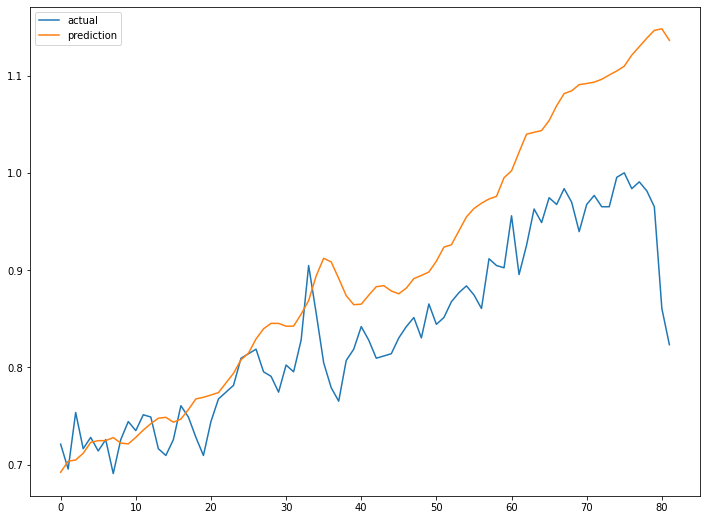

In [160]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [169]:
test_label.shape

(82, 1)

In [175]:
test_label.reshape(-1, 1)

array([[0.72093023],
       [0.69534884],
       [0.75348837],
       [0.71627907],
       [0.72790698],
       [0.71395349],
       [0.7255814 ],
       [0.69069767],
       [0.7255814 ],
       [0.74418605],
       [0.73488372],
       [0.75116279],
       [0.74883721],
       [0.71627907],
       [0.70930233],
       [0.7255814 ],
       [0.76046512],
       [0.74883721],
       [0.72790698],
       [0.70930233],
       [0.74418605],
       [0.76744186],
       [0.7744186 ],
       [0.78139535],
       [0.80930233],
       [0.81395349],
       [0.81860465],
       [0.79534884],
       [0.79069767],
       [0.7744186 ],
       [0.80232558],
       [0.79534884],
       [0.82790698],
       [0.90465116],
       [0.85581395],
       [0.80465116],
       [0.77906977],
       [0.76511628],
       [0.80697674],
       [0.81860465],
       [0.84186047],
       [0.82790698],
       [0.80930233],
       [0.81162791],
       [0.81395349],
       [0.83023256],
       [0.84186047],
       [0.851

In [174]:
scaler.inverse_transform(test_label.reshape(-1, 1))

ValueError: ignored